In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("data/train.csv")

In [4]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data["Cabin_letter"] = data["Cabin"].str.slice(0, 1)
data.loc[data["Cabin_letter"].isna(), "Cabin_letter"] = ""

In [8]:
cat_type = pd.CategoricalDtype(sorted(data["Cabin_letter"].unique()), ordered=True)
data["Cabin_letter"] = data["Cabin_letter"].astype(cat_type)

In [9]:
cat_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Cabin_letter", "Embarked"]

In [10]:
data["Name"] = data["Name"].str.split(",").str[0]

C:\Users\User\AppData\Local\Temp\ipykernel_20420\1946725019.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(data.groupby(cat_columns[i])["Survived"].mean().reset_index(), x=cat_columns[i], y="Survived")


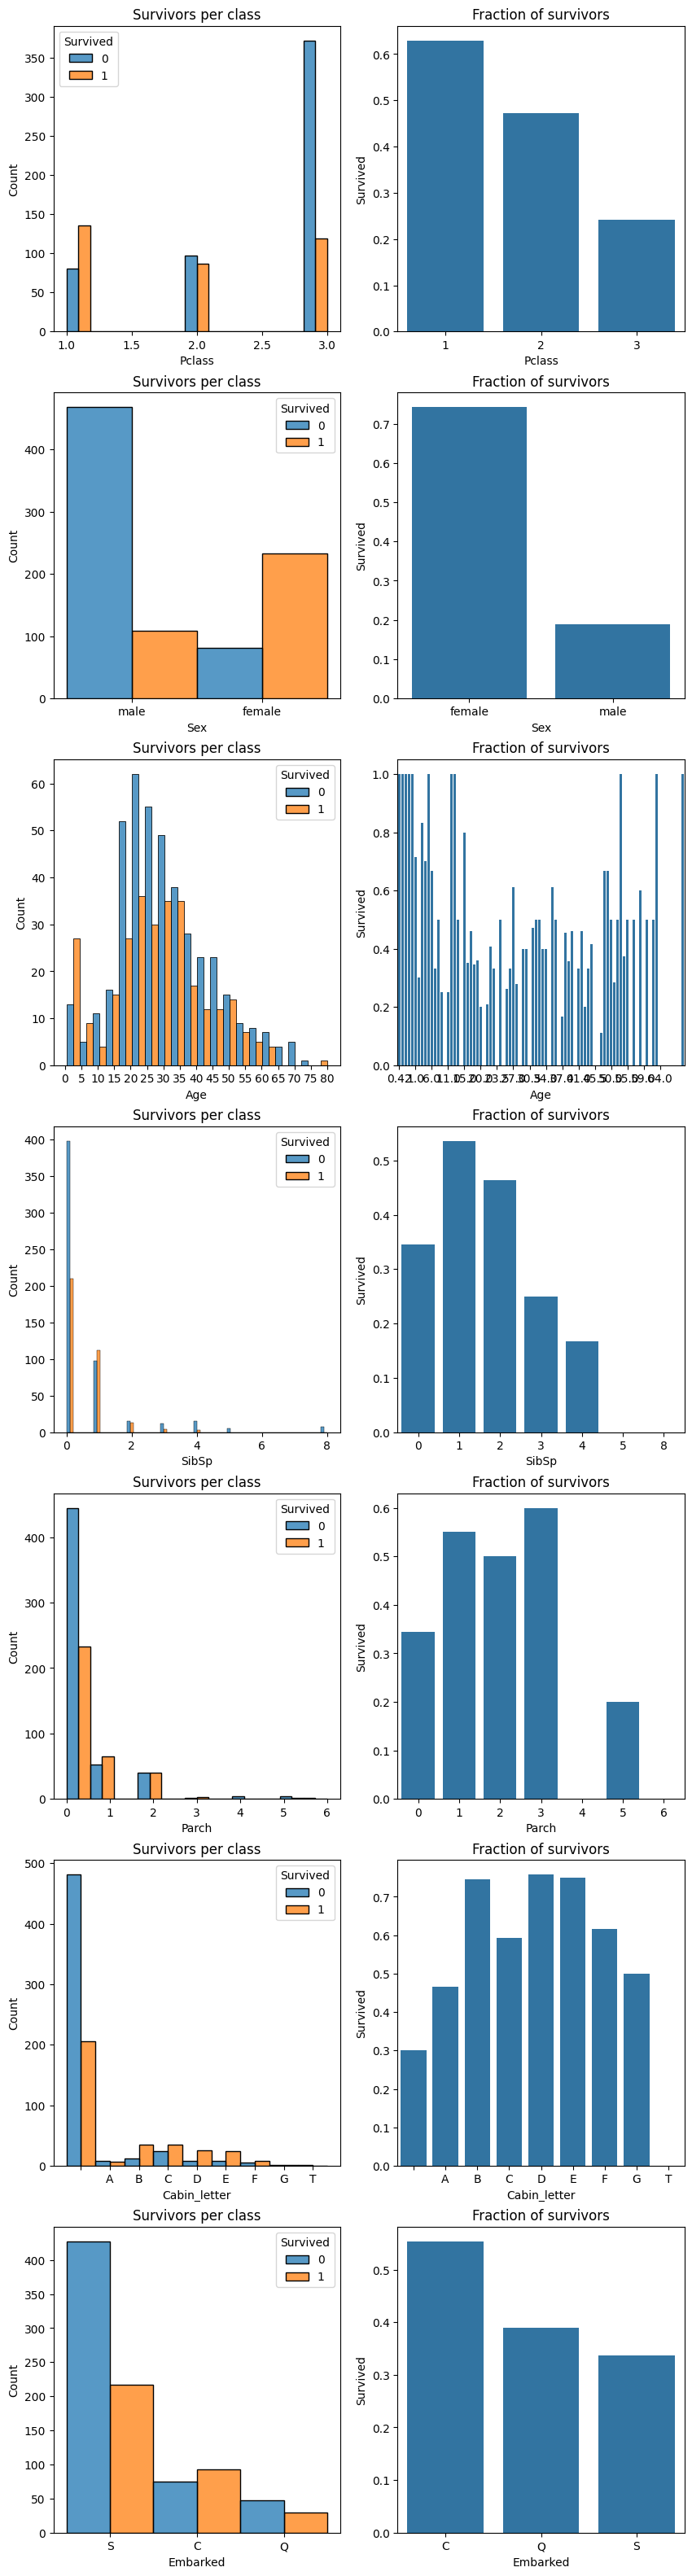

In [11]:
plt.figure(figsize=(10, 40))
for i in range(len(cat_columns)):
    plt.subplot(len(cat_columns), 2, 2*i+1)
    sns.histplot(data, x=cat_columns[i], hue="Survived", multiple="dodge")
    plt.title("Survivors per class")
    if cat_columns[i] == "Age": plt.xticks(np.arange(0, 81, 5))
    
    plt.subplot(len(cat_columns), 2, 2*i+2)
    sns.barplot(data.groupby(cat_columns[i])["Survived"].mean().reset_index(), x=cat_columns[i], y="Survived")
    plt.title("Fraction of survivors")
    if cat_columns[i] == "Age": plt.xticks(np.arange(0, 81, 5))

plt.show()

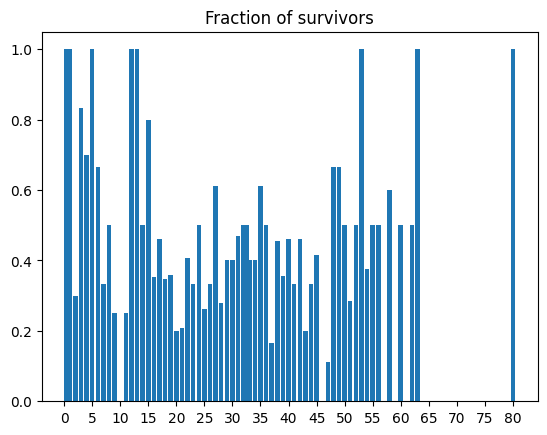

In [12]:
plt.bar(data=data.groupby("Age")["Survived"].mean().reset_index(), x="Age", height="Survived")
plt.title("Fraction of survivors")
plt.xticks(np.arange(0, 81, 5))
plt.show()

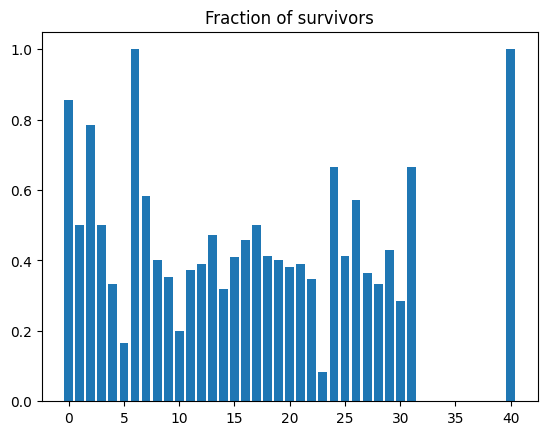

In [15]:
data_2 = data.copy()
data_2["Age"] = data_2["Age"] // 2
plt.bar(data=data_2.groupby("Age")["Survived"].mean().reset_index(), x="Age", height="Survived")
plt.title("Fraction of survivors")
plt.show()

In [16]:
data["Cabin_number"] = data["Cabin"].str.strip().str.slice(1)
data["Cabin_number"] = np.where(data["Cabin_number"].isna(), -1, data["Cabin_number"])
data["Cabin_number"] = np.where(data["Cabin_number"].str.isdigit(), data["Cabin_number"], 200)
data["Cabin_number"] = data["Cabin_number"].astype(np.int16)

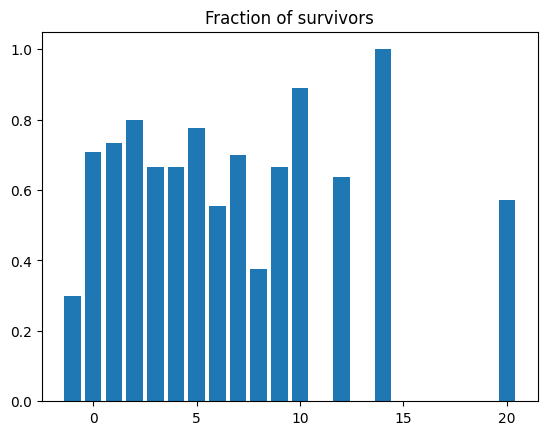

In [18]:
dataa = data.loc[:, ["Cabin_number", "Survived"]]
dataa["Cabin_number"] = dataa["Cabin_number"] // 10
plt.bar(data=dataa.groupby("Cabin_number")["Survived"].mean().reset_index(), x="Cabin_number", height="Survived")
plt.title("Fraction of survivors")
plt.show()

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_letter,Cabin_number
0,1,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S,,-1
1,2,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
2,3,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,,-1
3,4,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S,C,123
4,5,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S,,-1


In [20]:
data["Ticket_1"] = data["Ticket"].str.split(" ").str[0]
data["Ticket_1"] = np.where(data["Ticket_1"].str.isdigit(), "NaN", data["Ticket_1"])

In [21]:
data["Ticket_1"].unique().shape

(44,)

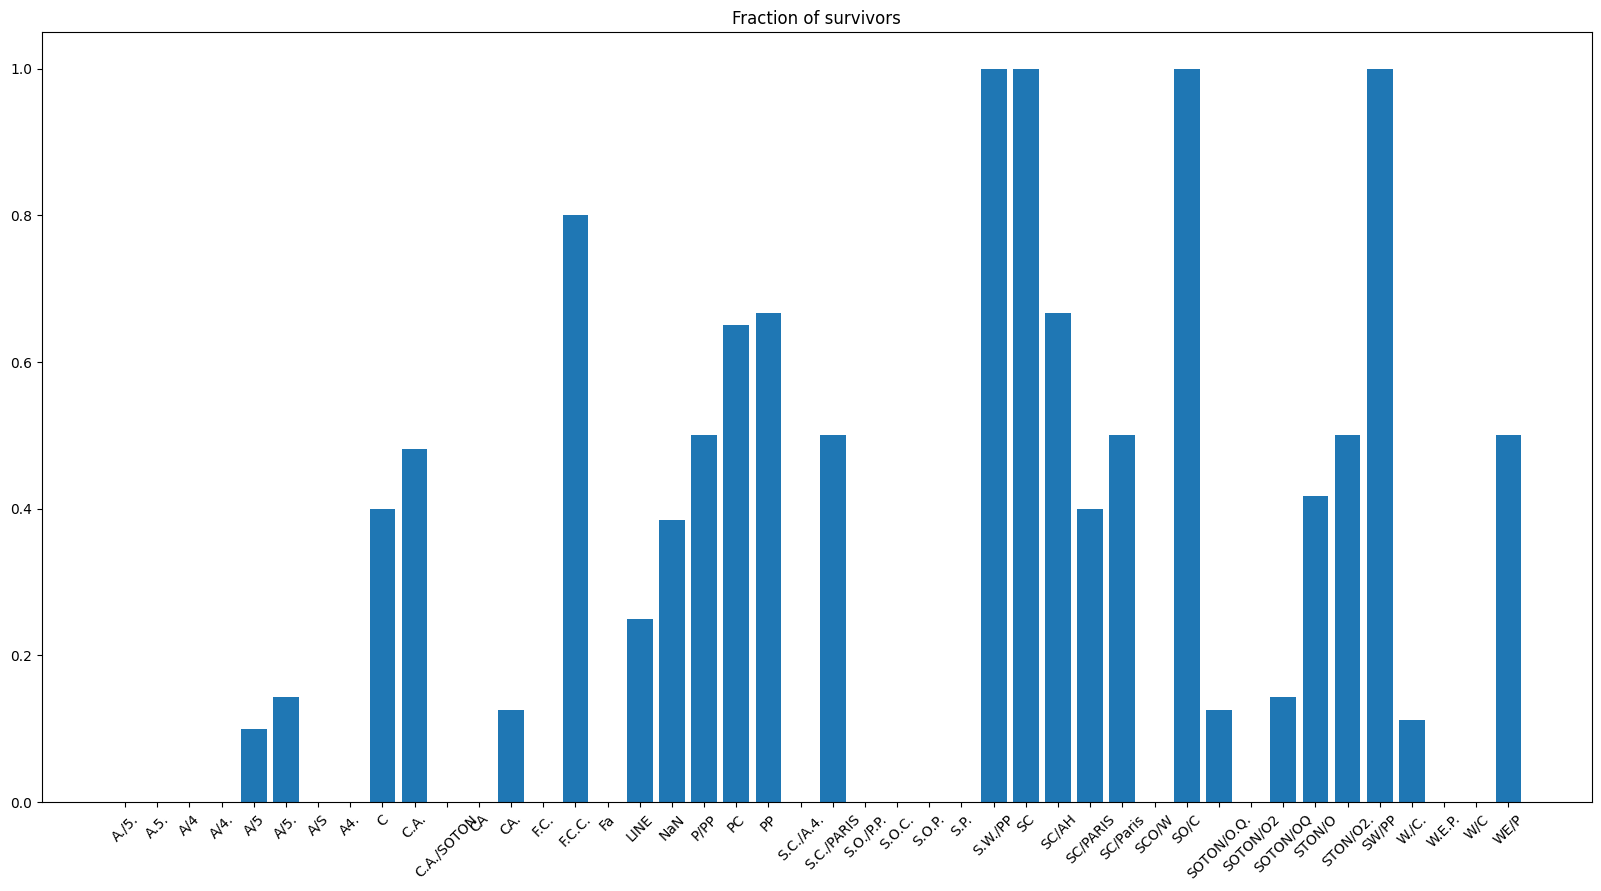

In [22]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
dataa = data.loc[:, ["Ticket_1", "Survived"]]
plt.bar(data=dataa.groupby("Ticket_1")["Survived"].mean().reset_index(), x="Ticket_1", height="Survived")
plt.title("Fraction of survivors")
#plt.grid("on")
plt.show()

In [ ]:
pipeline = make_pipeline(
    ("ohe", OneHotEncoder(handle_unknown="ignore"), ["Cabin_letter", "Embarked", "Name", "Sex", "SibSp", "Parch"]